¡Hola Stephania! Como te va?

Mi nombre es Emanuel Fitta! Un gusto conocerte, seré tu revisor en este proyecto.

A continuación un poco sobre la modalidad de revisión que usaremos:

Cuando enccuentro un error por primera vez, simplemente lo señalaré, te dejaré encontrarlo y arreglarlo tú cuenta. Además, a lo largo del texto iré haciendo algunas observaciones sobre mejora en tu código y también haré comentarios sobre tus percepciones sobre el tema. Pero si aún no puedes realizar esta tarea, te daré una pista más precisa en la próxima iteración y también algunos ejemplos prácticos. Estaré abierto a comentarios y discusiones sobre el tema.

Encontrará mis comentarios a continuación: **no los mueva, modifique ni elimine**.

Puedes encontrar mis comentarios en cuadros verdes, amarillos o rojos como este:

<div class="alert alert-block alert-success">
<b>Comentario del revisor.</b> <a class="tocSkip"></a>

Exito. Todo se ha hecho de forma exitosa.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor.</b> <a class="tocSkip"></a>

Observación. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">

<b>Comentario del revisor.</b> <a class="tocSkip"></a>

Necesita arreglos. Este apartado necesita algunas correcciones. El trabajo no puede ser aceptado con comentarios rojos. 
</div>

Puedes responder utilizando esto:

<div class="alert alert-block alert-info">
<b>Respuesta de estudiante.</b> <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-danger">
<b>Review General. (Iteración 1) </b> <a class="tocSkip"></a>

Buen día Stephania! Pues dejame felicitarte por el gran trabajo que estás realizando. Sin embargo hay un detalle más adelante en el notebook, que no permite seguir revisandolo. Y es que tal vez, borraste accidentalmente la celda donde defines el dataframe filtered_orders. ¿Te parece si lo agregas? Estoy seguro que es un detalle nada más.
    
Te deseo un gran día. Si existe alguna duda sobre como continuar el proyecto, por favor, escribelo en el notebook y con gusto te apoyaré en futuras iteraciones.



<div class="alert alert-block alert-danger">
<b>Review General. (Iteración 2)</b> <a class="tocSkip"></a>

¡Hola Stephania! 😊

Te felicito por el esfuerzo y la profundidad que estás dando a este análisis A/B. ¡Has avanzado muchísimo!

Sin embargo, es importante que revises tu notebook nuevamente, ya que se presentan varios errores de ejecución relacionados con **variables no definidas**, especialmente en la sección final del proyecto. Esto impide que podamos ver correctamente las últimas conclusiones.

Por ejemplo:
- La variable `ordersByUsersA` no fue creada antes de ser usada.
- `abnormalUsers` se construye con una columna incorrecta (`revenue` en lugar de `visitorid`).


💡 **Recomendación importante**: antes de enviar cualquier proyecto, asegúrate de hacer un **"Restart & Run All"** desde el menú del notebook. Esto permite verificar que todas las celdas están en orden y que no dependes de ejecuciones anteriores. Esto te ayudará a detectar errores como variables no definidas o celdas saltadas.

Te recomiendo regresar a estas celdas, revisar que todas las variables necesarias estén bien definidas antes de usarlas, y probar ejecutar tu notebook completo de principio a fin. Eso garantizará que el flujo lógico del proyecto se mantenga claro y sin interrupciones.

Estoy seguro de que una vez que corrijas estos detalles técnicos, tu trabajo quedará excelente. ¡Mucho ánimo! Si necesitas ayuda en alguna parte, estaré encantado de apoyarte en la siguiente iteración.

</div>



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import numpy as np
import math as mth
from scipy.stats import mannwhitneyu

#hypotheses = pd.read_csv("C:\\Users\\Stephania\\.vscode\\P10\\hypotheses_us.csv", sep=';')
#orders = pd.read_csv("C:\\Users\\Stephania\\.vscode\\P10\\orders_us.csv", sep=',')
#visits = pd.read_csv("C:\\Users\\Stephania\\.vscode\\P10\\visits_us.csv", sep=',')

hypotheses = pd.read_csv("/datasets/hypotheses_us.csv", sep=';')
orders = pd.read_csv("/datasets/orders_us.csv", sep=',')
visits = pd.read_csv("/datasets/visits_us.csv", sep=',')

In [2]:
hypotheses.columns = hypotheses.columns.str.lower()
orders.columns = orders.columns.str.lower()
visits.columns = visits.columns.str.lower()


print(hypotheses.head(10))
print(orders.head(10))
print(visits.head(10))

                                          hypothesis  reach  impact  \
0  Add two new channels for attracting traffic. T...      3      10   
1  Launch your own delivery service. This will sh...      2       5   
2  Add product recommendation blocks to the store...      8       3   
3  Change the category structure. This will incre...      8       3   
4  Change the background color on the main page. ...      3       1   
5  Add a customer review page. This will increase...      3       2   
6  Show banners with current offers and sales on ...      5       3   
7  Add a subscription form to all the main pages....     10       7   
8  Launch a promotion that gives users discounts ...      1       9   

   confidence  effort  
0           8       6  
1           4      10  
2           7       3  
3           3       8  
4           1       1  
5           2       3  
6           8       3  
7           8       5  
8           9       5  
   transactionid   visitorid        date  revenue

# **Parte 1. Priorizar hipótesis**


El archivo hypotheses_us.csv contiene nueve hipótesis sobre cómo aumentar los ingresos de una tienda online con Reach, Impact, Confidence y Effort especificados para cada una.


1.1. Aplicar el framework ICE para priorizar hipótesis. Ordenarlas en orden descendente de prioridad.

In [3]:
hypotheses['ICE'] = (
    hypotheses['impact']
    * hypotheses['confidence']
) / hypotheses['effort']
print(hypotheses[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False))

                                          hypothesis        ICE
8  Launch a promotion that gives users discounts ...  16.200000
0  Add two new channels for attracting traffic. T...  13.333333
7  Add a subscription form to all the main pages....  11.200000
6  Show banners with current offers and sales on ...   8.000000
2  Add product recommendation blocks to the store...   7.000000
1  Launch your own delivery service. This will sh...   2.000000
5  Add a customer review page. This will increase...   1.333333
3  Change the category structure. This will incre...   1.125000
4  Change the background color on the main page. ...   1.000000


1.2. Aplicar el framework RICE para priorizar hipótesis. Ordenarlas en orden descendente de prioridad.

In [4]:
hypotheses['RICE'] = (
    hypotheses['reach']
    *hypotheses['impact']
    * hypotheses['confidence']
) / hypotheses['effort']
print(hypotheses[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))

                                          hypothesis   RICE
7  Add a subscription form to all the main pages....  112.0
2  Add product recommendation blocks to the store...   56.0
0  Add two new channels for attracting traffic. T...   40.0
6  Show banners with current offers and sales on ...   40.0
8  Launch a promotion that gives users discounts ...   16.2
3  Change the category structure. This will incre...    9.0
1  Launch your own delivery service. This will sh...    4.0
5  Add a customer review page. This will increase...    4.0
4  Change the background color on the main page. ...    3.0


1.3. Mostrar cómo cambia la priorización de hipótesis cuando utilizas RICE en lugar de ICE. Proporcionar una explicación de los cambios.

La hipótesis 7 pasa a primer lugar al utilizar el framework RICE pues su parámetro de alcance, reach es el más alto (10) frente al parámetro reach de la hipótesis 8 (1) que se encontraba en primer lugar al aplicar el framework ICE (no se considera el alcance aquí) y desciende al aplicar el framework que considera el alcance como uno de sus parámetros.
Lo mismo ocurre con la hipótesis 2, que tiene el segundo valor más alto del parámetro reach; pasando de estar en el quinto lugar cuando se utiliza el framework ICE al segundo al utilizar RICE.
En general, el parámetro de alcance aumentaa significativamente los valores del framework que se utiliza para priorizar hipótesis, es decir, da más peso a hipótesis que afectan a más usuarios.Por otro lado, ICE

<div class="alert alert-block alert-success">
<b>Comentario del revisor. (Iteración 1) </b> <a class="tocSkip"></a>

Muy bien! Has calculado de manera correcat tanto ICE como RICE. Y precisamente, la conclusión que obtienes es correcta. 

# **Parte 2. Análisis del test A/B**

Realizaste una prueba A/B y obtuviste los resultados descritos en los archivos orders_us.csv y visits_us.csv.

Ejercicio: Analiza el test A/B

Para realizar el análisis de los resultados obtenidos en un test A/B, primero se deben observar las características de ambos grupos.Primero, se convierten las columnas que muestran fechas al formato datetime para poder trabajar con ellos más adelante.
Luego, utilizando el dataframe orders, se cuentan la cantidad de órdenes realizadas por cada grupo pues esto permitirá obtener la tasa de conversión mas adelante.
Respecto al dataframe visits, se debe comprobar que un mismo usuario no esté en ambos grupos.Si esto sucede, es necesario conocer cuántos son los usuarios que se repiten en ambos grupos y luego decidir qué hacer con ellos para que estos no ensucien los datos en general, ya que esto corresponde a una anomalía. 
Para comenzar el análisis en sí, se debe conocer la naturaleza de los datos presentados en ambos dataframe por lo que es útil conocer cuántos usuarios convierten y cuánto gastan aquellos que compran


<div class="alert alert-block alert-success">
<b>Comentario del revisor. (Iteración 1) </b> <a class="tocSkip"></a>

Hey! Muchas felicidades por agregar esta breve descripción de los pasos que seguirás a continuación. Lo veo más que bien!

In [5]:
# primero se convierte la columna de fecha de ambos datasets a tipo datetime
orders['date'] = pd.to_datetime(orders['date'])
visits['date'] = pd.to_datetime(visits['date'])

In [6]:
# se cuentan los usuarios que realizaron órdenes por cada grupo
order_group_count = orders['group'].value_counts()

print(order_group_count)

B    640
A    557
Name: group, dtype: int64


In [7]:
# se calcula el total de visitas por grupo
total_visits_by_group = visits.groupby('group')['visits'].sum()

print(total_visits_by_group)

group
A    18736
B    18916
Name: visits, dtype: int64


In [8]:
#se verifica que un mismo ususario no se encuentre en ambos grupos 
# agrupar por visitorId y contar los grupos únicos
group_counts = orders.groupby('visitorid')['group'].nunique()

# Filtrar usuarios con más de un grupo (A y B)
users_in_multiple_groups = group_counts[group_counts > 1]

print("Usuarios en más de un grupo (A y B):")
print(users_in_multiple_groups.head(3))


Usuarios en más de un grupo (A y B):
visitorid
8300375      2
199603092    2
232979603    2
Name: group, dtype: int64


In [9]:
#contar la cantidad de usuarios problemáticos, es decir, que se encuentran en más de un grupo a la vez
num_users_in_multiple_groups = len(users_in_multiple_groups)

print(f"Número de usuarios en más de un grupo (A y B): {num_users_in_multiple_groups}")

Número de usuarios en más de un grupo (A y B): 58


In [10]:
#se eliminan los 58 usuarios que realizaron compras en ambos grupos y se trabaja con 
# el dataframe resultante de esta limpieza peus considerarlos puede sesgar los resultados e 
# invalidar la aleatorización del test A/B

# se sobrescribe el DataFrame original con los datos limpios
orders = orders[~orders['visitorid'].isin(users_in_multiple_groups)].copy()


print(f"Número de registros después de limpieza: {len(orders)}")
print(f"Usuarios eliminados: {len(users_in_multiple_groups)}")

Número de registros después de limpieza: 1197
Usuarios eliminados: 58


In [11]:
# se cuentan los usuarios que realizaron órdenes por cada grupo
order_group_count = orders['group'].value_counts()

print(order_group_count)

B    640
A    557
Name: group, dtype: int64


<div class="alert alert-block alert-success">
<b>Comentario del revisor. (Iteración 1) </b> <a class="tocSkip"></a>

Me gusta como usaste groupby para resolver este punto, muy bien!

Ahora, la modificacion del dataframe orders, muestra solo a los usuarios que interactuaron en un solo grupo.Con este dataframe se trabajará para probar la hipótesis de que las proporciones de los ingresos por pedidos son iguales en ambos grupos, pero primero se debe probar si los datasets están modelados con precisión por la distribución normal utilizando una prueba de normalidad de Shapiro-Wilk

Prueba de Normalidad (Shapiro-Wilk)
Estadístico = 0.1034, p-value = 0.000e+00
Los datos NO siguen una distribución normal (se rechaza H0).


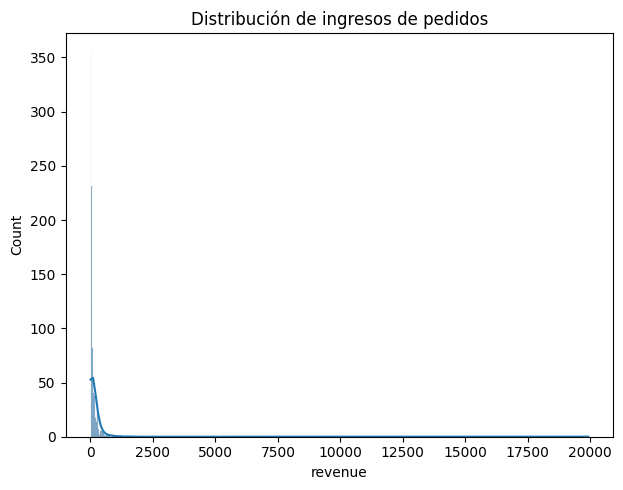

In [12]:
data = orders['revenue'].dropna()  # Elimina valores nulos si los hay

# Aplicar prueba de Shapiro-Wilk
results= st.shapiro(data)
p_value = results[1]
stat= results[0]

# Interpretación de resultados
alpha = 0.05  # Nivel de significancia
print("Prueba de Normalidad (Shapiro-Wilk)")
print(f"Estadístico = {stat:.4f}, p-value = {p_value:.3e}")

if p_value > alpha:
    print("Los datos siguen una distribución normal (no se rechaza H0).")
else:
    print("Los datos NO siguen una distribución normal (se rechaza H0).")


# Histogramas
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data, kde=True)
plt.title("Distribución de ingresos de pedidos")

plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor. (Iteración 1) </b> <a class="tocSkip"></a>

Perfecto! Las conclusiones que agregas son muy precisas. El proponer Mann Whitney en lugar de ttest, habla de tu entendimiento de la estadística detrás de los tests. 

Como los datos que muestran lo ingresos de los pedidos realizados por los usuarios no poseen una distribución normal, se deben realizar una pruebas significancia estadística de de Wilcoxon-Mann-Whitney para comparar los resultados de ambos grupos A y B respecto de los ingresos de pedidos y concluir si el tamaño de las series es significativamente diferente, es decir, si existe alguna diferencia entre las tasas de conversión entre un grupo y otro, ya que estamos comparando los ingresos de los pedidos 

2.1 Representa gráficamente el ingreso acumulado por grupo. Haz conclusiones y conjeturas.

In [13]:
filtered_orders = pd.DataFrame(orders)
# se agrupan los ingresos por grupo y fecha
grouped_orders = filtered_orders.groupby(['group', 'date'])['revenue'].sum().reset_index()

# se calculan los ingresos acumulados por grupo
grouped_orders['cumulative_revenue'] = grouped_orders.groupby('group')['revenue'].cumsum()

print(grouped_orders)


   group       date  revenue  cumulative_revenue
0      A 2019-08-01   2356.8              2356.8
1      A 2019-08-02   1503.5              3860.3
2      A 2019-08-03   1815.2              5675.5
3      A 2019-08-04   1146.6              6822.1
4      A 2019-08-05   1988.1              8810.2
..   ...        ...      ...                 ...
57     B 2019-08-27   2319.8             82161.3
58     B 2019-08-28   1558.0             83719.3
59     B 2019-08-29   3623.7             87343.0
60     B 2019-08-30   3393.3             90736.3
61     B 2019-08-31   2104.3             92840.6

[62 rows x 4 columns]


<div class="alert alert-block alert-danger">
<b>Comentario del revisor. (Iteración 1) </b> <a class="tocSkip"></a>

Mira Stephania, por acá, parece que olvidaste definir el dataframe filtered_orders. ¿Te parece si lo agregas, para poder seguir revisando tu proyecto? De cualquier forma si tienes alguna duda, por favor, cuenta conmigo, escribelo en el notebook y con gusto en futuras iteraciones puedo apoyarte. Te coloco el error que obtengo: 
    
    NameError: name 'filtered_orders' is not defined

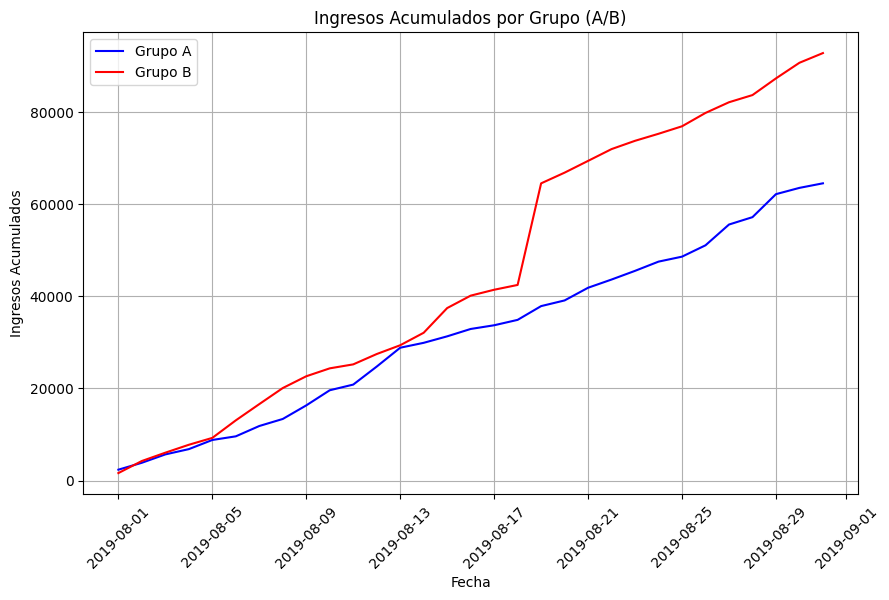

In [14]:

plt.figure(figsize=(10, 6))

# gráfico para el grupo A
group_a = grouped_orders[grouped_orders['group'] == 'A']
plt.plot(group_a['date'], group_a['cumulative_revenue'], label='Grupo A', color='blue')

# gráfico para el grupo B
group_b = grouped_orders[grouped_orders['group'] == 'B']
plt.plot(group_b['date'], group_b['cumulative_revenue'], label='Grupo B', color='red')

# Añadir detalles al gráfico
plt.title('Ingresos Acumulados por Grupo (A/B)')
plt.xlabel('Fecha')
plt.ylabel('Ingresos Acumulados')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

Se observa que los ingresos acumulados de ambos grupos crecen de manera similar hasta el día 5 de agosto del 2019, luego de eso se empiezan a notar las diferencias de crecimiento entre ellos.luego del día 17 del mismo mes, el grupo B presenta un crecimiento muy alto en un lapso muy pequeño, mientras que el grupo A mantiene su crecimiento constante y más lento que el otro.Este comportamiento se puede deber a alguna anomalía y se debe buscar la razón de esta para poder tener un análisis certero.
En general, el grupo B presenta más ingresos acumulados en el tiempo que el grupo A, esto se puede deber a diferencias en la base de usuarios, estacionalidad o eventos externos.

2.2 Representa gráficamente el tamaño de pedido promedio acumulado por grupo. Haz conclusiones y conjeturas.

   transactionid   visitorid       date  revenue group
0     3667963787  3312258926 2019-08-15     30.4     B
1     2804400009  3642806036 2019-08-15     15.2     B
2     2961555356  4069496402 2019-08-15     10.2     A
3     3797467345  1196621759 2019-08-15    155.1     B
4     2282983706  2322279887 2019-08-15     40.5     B


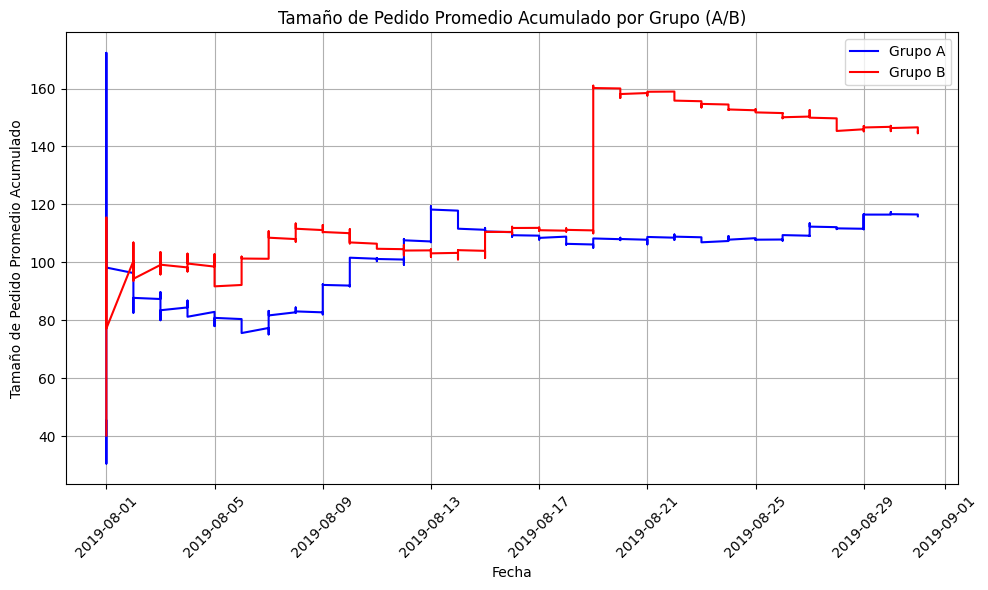

In [15]:
filtered_orders = filtered_orders.sort_values(by=['group', 'date'])

# se calcula el tamaño de pedido promedio acumulado por grupo
filtered_orders['cumulative_revenue'] = filtered_orders.groupby('group')['revenue'].cumsum()
filtered_orders['cumulative_orders'] = filtered_orders.groupby('group').cumcount() + 1
filtered_orders['cumulative_avg_order_size'] = filtered_orders['cumulative_revenue'] / filtered_orders['cumulative_orders']

# Mostrar las primeras filas para verificar
print(orders.head())

plt.figure(figsize=(10, 6))

# grafica para el grupo A
group_a = filtered_orders[filtered_orders['group'] == 'A']
plt.plot(group_a['date'], group_a['cumulative_avg_order_size'], label='Grupo A', color='blue')

# grafica para el grupo B
group_b = filtered_orders[filtered_orders['group'] == 'B']
plt.plot(group_b['date'], group_b['cumulative_avg_order_size'], label='Grupo B', color='red')


plt.title('Tamaño de Pedido Promedio Acumulado por Grupo (A/B)')
plt.xlabel('Fecha')
plt.ylabel('Tamaño de Pedido Promedio Acumulado')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()


plt.show()

2.3 Representa gráficamente la diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A. Haz conclusiones y conjeturas.

(array([18109., 18113., 18117., 18121., 18125., 18129., 18133., 18137.,
        18140.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

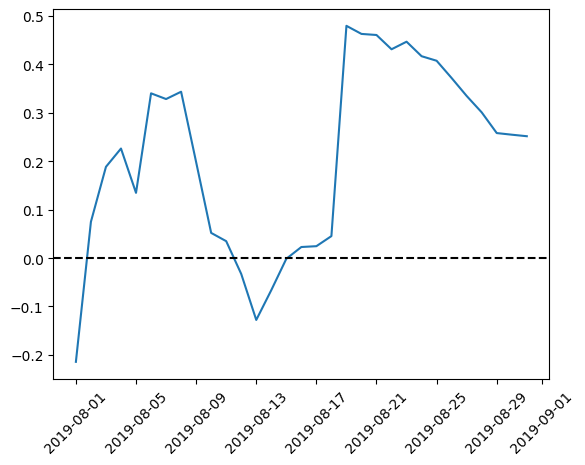

In [16]:
datesGroups = orders[['date', 'group']].drop_duplicates()

#se declara esta nueva variable para almacenar fecha, grupo, numero de pedidos distintos para el grupo de prueba dentro del lapso de estudio, número de usuarios distintos en el grupo de prueba que realizan al menos un pedido dentro del lapso de estuduio y los ingresos totales de pedidos en el grupo dentro del lapso de estudio
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date': 'max','group': 'max','transactionid': pd.Series.nunique,'visitorid': pd.Series.nunique,'revenue': 'sum',}),axis=1,).sort_values(by=['date', 'group'])

#se declara esta variable para almacenar fecha, grupo de la prueba y número de pedidos distintos para cada grupo dentro del lapso de estudio.
visitorsAggregated = datesGroups.apply(lambda x: visits[np.logical_and(visits['date'] <= x['date'], visits['group'] == x['group'])].agg({'date': 'max', 'group': 'max', 'visits': 'sum'}),axis=1,).sort_values(by=['date', 'group'])

#se unen las tablas creadas anteriormente mediante la columna date y group
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date','group','orders','buyers','revenue','visits',]

#se almacenan los datos sobre fechas, ingresos y número de pedidos para los grupos A y B.
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][['date', 'revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][['date', 'revenue', 'orders']]

#se unen las tablas por la columna 'date'
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB,on='date',how='left',suffixes=('A', 'B'))

# Seleccionar solo las columnas necesarias
mergedCumulativeRevenue = mergedCumulativeRevenue[['date', 'revenueA', 'ordersA', 'revenueB', 'ordersB']]

plt.plot(mergedCumulativeRevenue['date'],(mergedCumulativeRevenue['revenueB'] / mergedCumulativeRevenue['ordersB'])/ (mergedCumulativeRevenue['revenueA']/ mergedCumulativeRevenue['ordersA'])- 1)
plt.axhline(y=0, color='black', linestyle='--')
plt.xticks(rotation=45)

En general los valores se encuentran sobre la línea del 0, por lo que se puede intuir que el grupo B tiene, en promedio, pedidos de mayor tamaño que el grupo A.
Se observa que los valores descienden el día 13 de agosto pero luego de eso vuelven a subir rápidamente hasta un valor máximo un par de días después.

2.4 Calcula la tasa de conversión de cada grupo como la relación entre los pedidos y el número de visitas de cada día. Representa gráficamente las tasas de conversión diarias de los dos grupos y describe la diferencia. Saca conclusiones y haz conjeturas.

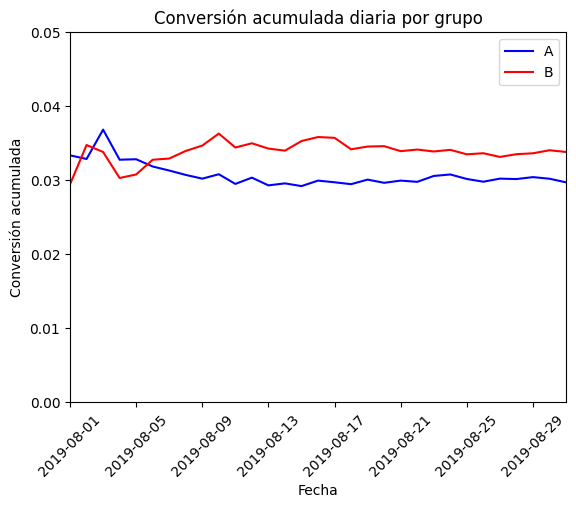

In [17]:
# se calcula la tasa de conversión utilizando los datos almacenados anteriormente en cumulative Data
cumulativeData['conversion'] = cumulativeData['orders'] / cumulativeData['visits']

# Filtrar datos para ambos grupos
cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A']
cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B']

# Gráfico para cada grupo
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A', color='blue')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B', color='red')

plt.axis([pd.to_datetime("2019-08-01"), pd.to_datetime('2019-08-31'), 0, 0.05])

plt.title('Conversión acumulada diaria por grupo')
plt.xlabel('Fecha')
plt.ylabel('Conversión acumulada')
plt.xticks(rotation=45)

plt.legend()
plt.show()

Al comienzo, el grupo A tenía una tasa de conversión más alta, pero luego de unos 5 días, el grupo B ve aumemtado este valor y se logra mantener casi constante y mayor a la del grupo A.

2.5 Traza un gráfico de dispersión del número de pedidos por usuario. Haz conclusiones y conjeturas.

Text(0, 0.5, 'Número de pedidos')

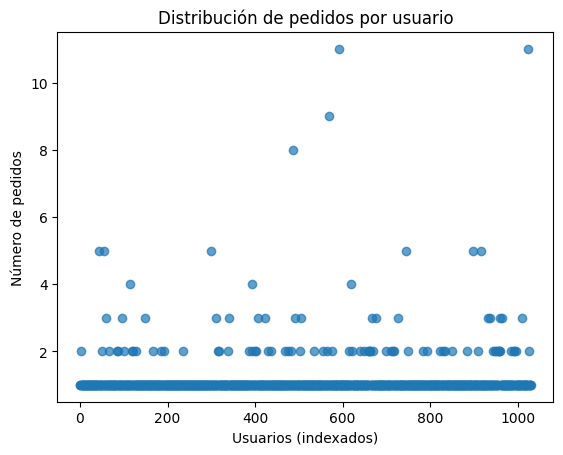

In [18]:

# se calcula el número de pedidos por usuario
orders_per_user = orders.groupby('visitorid')['transactionid'].nunique().reset_index()
orders_per_user.columns = ['visitorid', 'num_orders']


plt.scatter(x= orders_per_user.index,y=orders_per_user['num_orders'], alpha=.7)


plt.title('Distribución de pedidos por usuario')
plt.xlabel('Usuarios (indexados)')
plt.ylabel('Número de pedidos')


A simle vista, se observan al menos 10 puntos atípicos, es decir, 10 usuarios que realizan mas de cuatros pedidos.Esto se debe confirmar analizando los percentiles del número de pedidos por usuario.

2.6 Calcula los percentiles 95 y 99 del número de pedidos por usuario. Define el punto en el cual un punto de datos se convierte en una anomalía.

In [19]:
orders_per_user = orders.groupby('visitorid')['transactionid'].nunique()
print(np.percentile(orders_per_user, [95, 99]))

[2. 4.]


Esto significa que el 5% de los usuarios realiza dos pedidos o más, y solo el 1% realiza 4 o más pedidos, lo que convierte a estos últimos en valores atípicos.

2.7 Traza un gráfico de dispersión de los precios de los pedidos. Haz conclusiones y conjeturas.

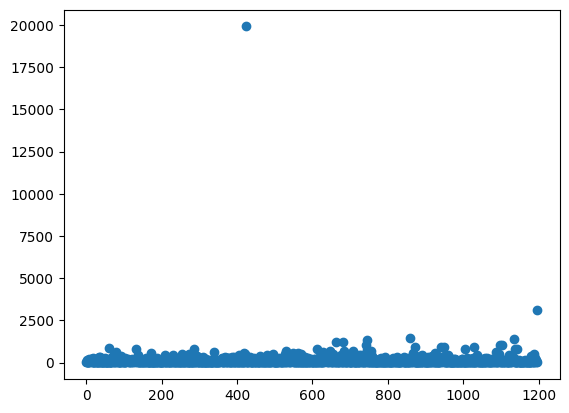

In [20]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])

A simple vista solo se observan 2 valores que están muy por fuera del rango de precios de pedidos en general.Para poder concluir algo respecto a esto con mayor fundamentos, se debe recurir al análisis de eprcentiles, solo de esta manera se puede saber cuántos son realmente los valores atipicos.

2.8 Calcula los percentiles 95 y 99 de los precios de los pedidos. Define el punto en el cual un punto de datos se convierte en una anomalía.

In [21]:
print(np.percentile(orders['revenue'], [95, 99]))

[435.54  900.904]


Esto significa que solo un 1% de los ussuarios realizan pedidos de más de $900.904

In [23]:
#se filtran aquellos usuarios que realizaron pedidos con un valor superior a 900.904
usersWithExpensiveOrders = orders.loc[orders['revenue'] > 900.904, 'revenue']

print(usersWithExpensiveOrders.head(20))
print(pd.DataFrame(usersWithExpensiveOrders).info())

425     19920.4
662      1220.2
682      1220.2
743      1050.0
744      1335.6
858      1450.2
940       905.8
949       930.0
1099     1015.9
1103     1025.8
1136     1425.8
1196     3120.1
Name: revenue, dtype: float64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 425 to 1196
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   revenue  12 non-null     float64
dtypes: float64(1)
memory usage: 192.0 bytes
None



<div class="alert alert-block alert-success">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

¡Excelente trabajo! Has desarrollado una serie de análisis sólidos para comparar los grupos A y B, usando gráficos, percentiles y métricas como ingresos acumulados, tamaño promedio de pedidos, tasas de conversión y análisis de anomalías. A continuación, te comparto un resumen con los aspectos destacados y algunas recomendaciones para afinar aún más tu enfoque:

### Puntos Positivos:

- **Visualizaciones claras y bien etiquetadas:** Los gráficos son informativos, con títulos adecuados, leyendas claras y buen uso del color para diferenciar grupos.
- **Análisis interpretativo:** Las conclusiones acompañan correctamente a cada gráfico y muestran una buena capacidad de interpretación de patrones.
- **Identificación de anomalías:** Aplicaste correctamente el análisis de percentiles para detectar outliers en precios y número de pedidos, un paso clave en el análisis exploratorio.

### Áreas para Seguir Mejorando:

- **Repetición de código:** Algunas líneas como la separación de grupos A/B y los `plt.plot(...)` se repiten mucho. Considera encapsular en funciones para evitar redundancias.
- **Nombres de variables:** Usa nombres más descriptivos en lugar de `x_values`, por ejemplo `pedido_indices` para que el código sea más autoexplicativo.
- **Formateo de resultados numéricos:** Cuando imprimes valores como percentiles o ingresos, formatearlos con separadores de miles y redondeos mejora la legibilidad (e.g., `f"{valor:,.2f}"`).
- **Conclusiones más cuantitativas:** Algunas observaciones son correctas pero algo vagas ("valores muy por fuera del rango"). Podrías reforzarlas con datos concretos: "un valor es X veces mayor al percentil 99".



</div>

2.9 Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos en bruto. Haz conclusiones y conjeturas.

Se debe buscar la significancia estadística de las diferencias en la tasa de conversión y entre los grupos, utilizando los datos "sin procesar" (es decir, los datos antes de eliminar las anomalías).Se crean las variables ordersByUsersA y ordersByUsersB con las columnas ['visitorid', 'orders'], donde el número de pedidos para los usuarios con al menos un pedido será especificado. Para estos se utiliza nuevamente la prueba de significancia estadística de Wilcoxon-Mann-Whitney

In [24]:
# comparación de INGRESOS (revenue) por transacción entre grupos A y B
revenueByUsersA = orders[orders['group'] == 'A']['revenue']
revenueByUsersB = orders[orders['group'] == 'B']['revenue']

alpha = .05

results_revenue = st.mannwhitneyu(revenueByUsersA, revenueByUsersB, True, 'less')

print(f"valor p: {results.pvalue:.5f}")

if (results_revenue.pvalue < alpha):
        print("Conclusión: Los ingresos en A son significativamente menores que en B (rechazo H0).")
else:
    print("Conclusión: No hay evidencia de que los ingresos en A sean menores (no se rechaza H0).")


valor p: 0.00000
Conclusión: No hay evidencia de que los ingresos en A sean menores (no se rechaza H0).


2.10 Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos en bruto. Haz conclusiones y conjeturas.

In [23]:
#Para calcular la importancia estadística de la diferencia en el tamaño promedio de 
# los pedidos entre los grupos, pasaremos los datos sobre los ingresos (revenue) al criterio 
# mannwhitneyu(). 

revenue_A = orders[orders['group']=='A']['revenue']
revenue_B = orders[orders['group']=='B']['revenue']

p_value = st.mannwhitneyu(revenue_A, revenue_B)[1]
rel_diff = revenue_B.mean() / revenue_A.mean() - 1

print("Resultados del análisis de ingresos por pedido:")
print(f"- Valor p (significancia estadística): {p_value:.3f}")
print(f"- Diferencia relativa en ingresos (B vs A): {rel_diff:.1%}")

# Interpretación automática
print("\nInterpretación:")
print(f"- Diferencia estadísticamente significativa: {'SÍ' if p_value < 0.05 else 'NO'}")
print(f"- Dirección del efecto: {'B > A' if rel_diff > 0 else 'B <= A'}")

Resultados del análisis de ingresos por pedido:
- Valor p (significancia estadística): 0.692
- Diferencia relativa en ingresos (B vs A): 25.2%

Interpretación:
- Diferencia estadísticamente significativa: NO
- Dirección del efecto: B > A


Como ya se vio anteriormente, no existe evidencia estadística para concluir que las distribuciones de ingresos entre los grupos A y B son significativamente diferentes.Esto puede ser porque se está trabajando con el dataframe orders sin filtrar datos atípicos.
Por otra parte, se indica que el grupo B tiene un 25,2% más de ingresos en promedio que el grupo A.Nuevamente, esto no concuerda con el valor p obtenido, por lo que se vuelve a mencionar que es porbable que se deba a los valores atípicos aún presentes

2.11 Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas.

In [38]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorid', as_index=False).agg({'transactionid' : pd.Series.nunique})
ordersByUsersA.columns = ['visitorid', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorid', as_index=False).agg({'transactionid' : pd.Series.nunique})
ordersByUsersB.columns = ['visitorid', 'orders']

#se filtran aquellos usuarios que realizaron pedidos con un valor superior a 900.904 y un número de pedidos mayor a 4
usersWithExpensiveOrders = orders.loc[orders['revenue'] > 900.904]['revenue'].unique()
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 4]['visitorid'], ordersByUsersB[ordersByUsersB['orders'] > 4]['visitorid']], axis = 0)

abnormalUsers = pd.concat([usersWithManyOrders,pd.Series(usersWithExpensiveOrders, name='visitorid')]).drop_duplicates().sort_values()

abnormalUsers_df = abnormalUsers.to_frame(name='visitorid')
print("\n=== Información completa ===")
print(abnormalUsers_df.info())



=== Información completa ===
<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 5 to 499
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   visitorid  15 non-null     float64
dtypes: float64(1)
memory usage: 240.0 bytes
None


In [39]:
# se filtra el DataFrame original para EXCLUIR esos usuarios
filtered_orders = orders[~orders['visitorid'].isin(abnormalUsers)]

# Verificación
print("=== Pedidos caros  ===")
print(filtered_orders[filtered_orders['revenue'] > 900.904][['visitorid', 'revenue']].head(20))

print("\n=== Info del DataFrame filtrado ===")
print(filtered_orders.info())

=== Pedidos caros  ===
       visitorid  revenue
425   1920142716  19920.4
662   4266935830   1220.2
682   4266935830   1220.2
743   4133034833   1050.0
744    888512513   1335.6
858   1316129916   1450.2
940   4003628586    905.8
949    887908475    930.0
1099   148427295   1015.9
1103  1164614297   1025.8
1136  1307669133   1425.8
1196  2108080724   3120.1

=== Info del DataFrame filtrado ===
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1158 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionid  1158 non-null   int64         
 1   visitorid      1158 non-null   int64         
 2   date           1158 non-null   datetime64[ns]
 3   revenue        1158 non-null   float64       
 4   group          1158 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 54.3+ KB
None


In [40]:

# Grupo A: usuarios normales que compraron (1) + usuarios que no compraron (0)
conversionA = pd.concat([
    pd.Series(1, index=ordersByUsersA[np.logical_not(ordersByUsersA['visitorid'].isin(abnormalUsers))].index, name='conversion'),
    pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])), name='conversion')
], axis=0)

# Grupo B: usuarios normales que compraron (1) + usuarios que no compraron (0)
conversionB = pd.concat([
    pd.Series(1, index=ordersByUsersB[np.logical_not(ordersByUsersB['visitorid'].isin(abnormalUsers))].index, name='conversion'),
    pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])), name='conversion')
], axis=0)

# se lleva a cabo la prueba estadística para conversión
p_value_conversion = st.mannwhitneyu(conversionA, conversionB)[1]
rel_diff_conversion = conversionB.mean() / conversionA.mean() - 1

print("Resultados del test A/B para conversión (excluyendo datos atípicos):")
print(f"- Valor p: {p_value_conversion:.5f}")
print(f"- Diferencia relativa en conversión (B vs A): {rel_diff_conversion:.1%}")

print("\nInterpretación:")
print(f"- Significancia estadística: {'SÍ' if p_value_conversion < 0.05 else 'NO'}")
print(f"- Dirección del efecto: {'B > A' if rel_diff_conversion > 0 else 'B <= A'}")

Resultados del test A/B para conversión (excluyendo datos atípicos):
- Valor p: 0.01631
- Diferencia relativa en conversión (B vs A): 15.5%

Interpretación:
- Significancia estadística: SÍ
- Dirección del efecto: B > A


2.12 Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas.

In [41]:
# Filtramos solo los pedidos de usuarios no atípicos
ordersFilteredA = orders[orders['visitorid'].isin(ordersByUsersA[np.logical_not(ordersByUsersA['visitorid'].isin(abnormalUsers))]['visitorid'])]
ordersFilteredB = orders[orders['visitorid'].isin(ordersByUsersB[np.logical_not(ordersByUsersB['visitorid'].isin(abnormalUsers))]['visitorid'])]

# se lleva a cabo la prueba estadística para tamaño promedio de pedido
p_value_avg_order = st.mannwhitneyu(ordersFilteredA['revenue'], ordersFilteredB['revenue'])[1]
rel_diff_avg_order = ordersFilteredB['revenue'].mean() / ordersFilteredA['revenue'].mean() - 1

print("\nResultados del test A/B para tamaño promedio de pedido (excluyendo datos atípicos):")
print(f"- Valor p: {p_value_avg_order:.5f}")
print(f"- Diferencia relativa en tamaño de pedido (B vs A): {rel_diff_avg_order:.1%}")

print("\nInterpretación:")
print(f"- Significancia estadística: {'SÍ' if p_value_avg_order < 0.05 else 'NO'}")
print(f"- Dirección del efecto: {'B > A' if rel_diff_avg_order > 0 else 'B <= A'}")


Resultados del test A/B para tamaño promedio de pedido (excluyendo datos atípicos):
- Valor p: 0.84658
- Diferencia relativa en tamaño de pedido (B vs A): 21.1%

Interpretación:
- Significancia estadística: NO
- Dirección del efecto: B > A


Estos resultados indican que, pese a observar que el grupo B presenta pedidos de un tamaño hasta 21,1% mayor que el grupo A, el valor p está muy por sobre la significancia de 0.05; por lo que no ha evidencia estadística suficiente para concluir que existe una diferencia significativa en el tamaño promedio de pedido entre grupos.

2.13 Toma una decisión basada en los resultados de la prueba. Las decisiones posibles son: 1. Parar la prueba, considerar a uno de los grupos como líder. 2. Parar la prueba, concluir que no hay diferencia entre los grupos. 3. Continuar la prueba.

El grupo B en general muestra un mejor desempeño en ingresos .Esto ocurre antes de filtrar datos anómalos y después de hacerlo, por lo que se recomendaría considerar el grupo B como lider y detener la prueba en ese punto si se quieren priorizar solo los ingresos.
Se recomienda además seguir haciéndole seguimiento al impacto de la implementación de las mejoras del grupo B de manera de verificar que la mejora en los valores de conversión se siguen manteniendo en el tiempo o siguen aumentando.



# Comentario General del Revisor

<div class="alert alert-block alert-success">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

¡Felicidades! Has completado una sección crítica del análisis A/B con una aplicación adecuada de pruebas estadísticas, interpretación de resultados y toma de decisiones fundamentada. Este tipo de análisis es clave en entornos de negocio reales. A continuación, te comparto lo más destacado y algunas sugerencias:

### Puntos Positivos:

- **Aplicación correcta de Mann-Whitney U Test:** Utilizaste apropiadamente la prueba no paramétrica para comparar conversiones e ingresos, tanto con datos brutos como filtrados.
- **Análisis con y sin outliers:** Excelente enfoque al repetir el análisis con datos limpios. Esto muestra un entendimiento profundo del impacto de las anomalías en la significancia estadística.
- **Interpretaciones claras y estructuradas:** Las conclusiones están bien escritas, con una lógica clara que conecta resultados numéricos con recomendaciones prácticas.
- **Toma de decisiones realista:** La decisión final basada en los ingresos y la estabilidad post-filtrado está bien justificada. Se nota pensamiento crítico aplicado.

### Áreas para Seguir Investigando:

- **Claridad en definición de variables:** Algunas variables como `abnormalUsers` o los filtros de visitas podrían beneficiarse de comentarios más explícitos para facilitar su comprensión futura.
- **Alternativas estadísticas adicionales:** Podrías explorar otros tests como el bootstrap para comparar medias o tasas, como forma adicional de validar resultados.
- **Automatización y reutilización:** Considera encapsular en funciones algunos pasos repetitivos (filtrado de outliers, testeo de hipótesis) para mejorar legibilidad y modularidad.

¡Gran trabajo! Esta sección demuestra un dominio sólido de estadística aplicada y capacidad analítica. Te animo a seguir profundizando en pruebas A/B, especialmente en contextos donde se requiera ajustar por múltiples comparaciones o realizar segmentaciones más específicas.

🚀📈 ¡Sigue adelante, estás muy cerca del nivel profesional!

</div>